##Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

##Importing dataset

In [2]:
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


##Label Encoding

In [3]:
label_encoder = preprocessing.LabelEncoder()
df['species']= label_encoder.fit_transform(df['species'])
df['species'].unique()



array([0, 1, 2])

##Standardizing dataset

In [4]:
df_std = (df - df.mean())/(df.std())
df_std.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,-1.220656
1,-1.139200,-0.131539,-1.335752,-1.311052,-1.220656
2,-1.380727,0.327318,-1.392399,-1.311052,-1.220656
3,-1.501490,0.097889,-1.279104,-1.311052,-1.220656
4,-1.018437,1.245030,-1.335752,-1.311052,-1.220656


##Covariance matrix

In [5]:
#Population
df.cov = np.cov(df_std.T,bias=1)
df.cov

array([[ 0.99333333, -0.11678599,  0.86594208,  0.81248819,  0.77734416],
       [-0.11678599,  0.99333333, -0.42558384, -0.36368509, -0.42381318],
       [ 0.86594208, -0.42558384,  0.99333333,  0.95644633,  0.9427078 ],
       [ 0.81248819, -0.36368509,  0.95644633,  0.99333333,  0.95017035],
       [ 0.77734416, -0.42381318,  0.9427078 ,  0.95017035,  0.99333333]])

In [6]:
#Sample
cov_mat = np.cov(df_std.T,bias=0)
cov_mat

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113,  0.78256123],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593, -0.42665756],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543,  0.9490347 ],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ,  0.95654733],
       [ 0.78256123, -0.42665756,  0.9490347 ,  0.95654733,  1.        ]])

##Calculating Eigen value & Eigen vector

In [7]:
eigen_val,eigen_vec = np.linalg.eig(cov_mat)
eigen_val

array([3.8370179 , 0.91413636, 0.18622615, 0.02053351, 0.04208608])

In [8]:
print(eigen_vec)

[[-0.44486332  0.38197963  0.75062477  0.26983859  0.14120121]
 [ 0.23336907  0.92097203 -0.28724936 -0.12175736  0.00351339]
 [-0.50604293  0.02871731  0.02833749 -0.82656861 -0.24305798]
 [-0.49689383  0.07063728 -0.38544602  0.47358279 -0.61258273]
 [-0.49462368 -0.00936826 -0.45241421  0.06975636  0.73872531]]


##Sorting the Eigen values & Eigen vectors

In [9]:
n=2 #principle components
top_eigen_vec  = eigen_vec[:,:n]
top_eigen_vec


array([[-0.44486332,  0.38197963],
       [ 0.23336907,  0.92097203],
       [-0.50604293,  0.02871731],
       [-0.49689383,  0.07063728],
       [-0.49462368, -0.00936826]])

In [10]:
pca = np.matmul(np.array(df_std),top_eigen_vec) #pca
print(pca.shape)

(150, 2)


##Visualization


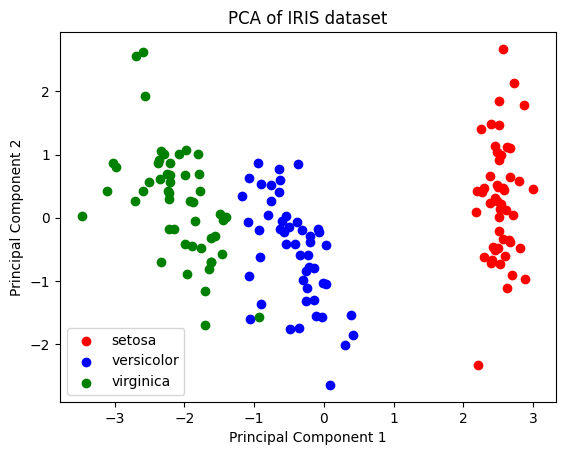

In [11]:
colors = ['red','blue','green']
speci = ['setosa','versicolor','virginica']

pca_x = pca[:,0]
pca_y = pca[:,1]

# Scatter plot with colors based on target (species)
for i in range(3):  # Loop through the 3 species
    plt.scatter(pca_x[df['species'] == i], pca_y[df['species'] == i],
                c=colors[i], label = speci[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS dataset')
plt.legend()
plt.show()
